<img src="Images/istockphoto-1306218631-612x612.jpg" style="width:900px;height:600px">

## EXPLORATORY DATA ANALYSIS FOR A NEW MOTION PICTURE STUDIO

## TEAM:
1. Stanley Macharia

2. Lionel Ajeliti

3. Linet Awino

4. Stephen Munyiala

5. Sharon Mumanyi

6. Justin Mbugua

# Introduction

Exploratory Data Analysis (EDA) is important for emerging studios into the ever-changing landscape of the entertainment business when it comes to what works at the boxoffice. This project performs exploratory data analysis on historical film data, looking for patterns that tie to the financial results of the film. Popular Genre, Release Timing, Budget Allocation, and Consumer Reception analysis will help to obtain actionable insights for a nascent movie studio’s content planning. The studio can make data-informed production decisions according to the market and future pattern which align so that the content produced has maximum chance to succeed and give maximum profit.

# Project Overview

## Business Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Business Understanding

The company is venturing into the interesting global of filmmaking with the release of a new movie studio. However, getting into the film industry with out prior revel in comes with its demanding situations. To ensure the studio starts strong, our role as data analysts is to dive deep into the dynamics of the film industry. By knowledge what drives container office achievement, we are able to offer actionable insights to assist form the studio’s content advent and manufacturing strategies.

To do this, we’ll discover key questions about the enterprise:

1. How many movies are released each year/month?

2. Which genre is most successful at the box office?

3. Which production budget range yield the most profitable movies?

## Data Understanding

For the exploratory analysis, we will make use of data collected from the following sources:

Box Office(https://www.boxofficemojo.com/)

IMDB(https://www.imdb.com/)

Rotten Tomatoes(https://www.rottentomatoes.com/)

TheMovieDB(https://www.themoviedb.org/)

The Numbers (https://www.the-numbers.com/)


## Data Cleaning and Preparation

In [94]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

## IMDB database

#### Creating a connection where we will be able to view and analyze what is in the database

In [95]:
#loading imdb database
conn = sqlite3.connect('zippedData/im.db')

movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)


In [96]:
# Check for missing values in each DataFrame
print("Movie Basics Missing Values:\n", movie_basics.isnull().sum())
print("\nMovie Ratings Missing Values:\n", movie_ratings.isnull().sum())

Movie Basics Missing Values:
 movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Movie Ratings Missing Values:
 movie_id         0
averagerating    0
numvotes         0
dtype: int64


In [97]:
# Drop rows with missing 'genres' in movie_basics
movie_basics.dropna(subset=['genres'], inplace=True)
movie_ratings.dropna(inplace=True)

In [98]:
#Fill the missing values in runtime_minutes with its mode
mode_runtime = movie_basics['runtime_minutes'].mode()[0]
movie_basics['runtime_minutes'].fillna(mode_runtime, inplace=True)

In [99]:
#Convert runtime_minutes into numeric data type
movie_basics['runtime_minutes'] = pd.to_numeric(movie_basics['runtime_minutes'], errors='coerce')

In [100]:
# Use inner join to keep only matching rows
movie_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner') 
movie_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,90.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73050,tt9914642,Albatross,Albatross,2017,90.0,Documentary,8.5,8


#### Here we will be able to see which genre has the most shows produced and also we will check the top 10 rate movies and from which genre they are from.

In [101]:
# Analyze genre distribution
genre_counts = movie_basics['genres'].str.split(',', expand=True).stack().value_counts()
print("\nGenre Counts:\n", genre_counts)


Genre Counts:
 Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
dtype: int64


In [102]:
top_rated_movies= pd.read_sql('''
            SELECT primary_title, genres, averagerating, numvotes
            FROM movie_basics
            JOIN movie_ratings
            USING(movie_id)
            ORDER BY averagerating DESC
            ''', conn).head(10)

top_rated_movies

,primary_title,genres,averagerating,numvotes
0,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.0,5
1,The Dark Knight: The Ballad of the N Word,"Comedy,Drama",10.0,5
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5
3,Hercule contre Hermès,Documentary,10.0,5
4,I Was Born Yesterday!,Documentary,10.0,6
5,Dog Days in the Heartland,Drama,10.0,5
6,Revolution Food,Documentary,10.0,8
7,Fly High: Story of the Disc Dog,Documentary,10.0,7
8,All Around Us,Documentary,10.0,6
9,The Paternal Bond: Barbary Macaques,Documentary,10.0,5


#### From the output above we can see that Documentaries are dominating the top 10 movies table. This shows that people enjoy watching documentaries more.

In [103]:
# Acquire writers name from writer and persons table

writers_query = """
SELECT writers.movie_id, persons.primary_name AS writers_names
FROM writers
JOIN persons ON writers.person_id = persons.person_id;
"""

writers_df = pd.read_sql(writers_query, conn)
writers_df

,movie_id,writers_names
0,tt0285252,Tony Vitale
1,tt0438973,Steve Conrad
2,tt0438973,Sean Sorensen
3,tt0462036,Bill Haley
4,tt0835418,Peter Gaulke
...,...,...
255866,tt8999892,Bradley T. Castle
255867,tt8999974,Daysi Burbano
255868,tt9001390,Bernard Lessa
255869,tt9004986,Fredrik Horn Akselsen


In [104]:
conn.close()

## A. Loading Data

#### At this section we will load all the datasets from various trusted sources; clean to make it make sense then do some exploration for the next section after this which will be data analysis.

### 1. Movie Info tsv file

In [105]:
movie_info_df = pd.read_csv('./zippedData/rt.movie_info.tsv', sep='\t')
print(movie_info_df.shape)
print(movie_info_df.info())
movie_info_df.head()

(1560, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### 2. Reviews tsv file

In [106]:
reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv', sep='\t', header=0, encoding='windows-1252')
print(reviews_df.shape)
print(reviews_df.info())
reviews_df.head()

(54432, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [107]:
reviews_df["rating"]

0          3/5
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
54427      NaN
54428      1/5
54429      2/5
54430    2.5/5
54431      3/5
Name: rating, Length: 54432, dtype: object

In [108]:
#Filling in the missing values

#filling missing reviews with "No review available" to distinguish them from actual reviews.
reviews_df['review'].fillna("No review available", inplace=True)

#Extract valid numeric ratings in the form "x/y"
numeric_ratings = reviews_df['rating'].str.extract(r'(\d+(\.\d+)?)/\d+').astype(float)

#Assign numeric values back to `rating` and fill missing values with the median
reviews_df['rating'] = numeric_ratings[0]
reviews_df['rating'].fillna(reviews_df['rating'].median(), inplace=True)

In [109]:
reviews_df["rating"]

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
54427    3.0
54428    1.0
54429    2.0
54430    2.5
54431    3.0
Name: rating, Length: 54432, dtype: float64

### 3. Movie Budgets tsv file

In [110]:
movie_budget_df = pd.read_csv('./zippedData/tn.movie_budgets.csv')
print(movie_budget_df.shape)
print(movie_budget_df.info())
movie_budget_df.head()

(5782, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [111]:
movie_budget_df.describe(include = 'all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",King Kong,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#removing the '$' sign, comas and changing the datatype changing the datatype 
#to float
movie_budget_df['domestic_gross']=movie_budget_df['domestic_gross'].str.replace("$","").str.replace(",","").astype('float')

In [114]:
movie_budget_df['worldwide_gross']=movie_budget_df['worldwide_gross'].str.replace("$","").str.replace(",","").astype('float')


In [115]:
movie_budget_df['production_budget']=movie_budget_df['production_budget'].str.replace("$","").str.replace(",","").astype('float')

In [163]:
# Changed the type of release_date column from object to datetime and added 
#seperate columns called "release year" and "release month"
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'], 
                                        format='%b %d, %Y', errors='coerce')
movie_budget_df['release_year'] = movie_budget_df['release_date'].dt.year
movie_budget_df['release_month'] = movie_budget_df['release_date'].dt.month

# Create a new column that adds up thedomestic and worldwide gross earnings
movie_budget_df['Total_Earnings'] = movie_budget_df['domestic_gross'] + movie_budget_df['worldwide_gross'] 

# checking for new columns
movie_budget_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,release_month,Total_Earnings,net_income,PB_ranges,profitable
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,3.536853e+09,3.111853e+09,$90-100M,Yes
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,1.286728e+09,8.761278e+08,$90-100M,Yes
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,1.925247e+08,-1.574753e+08,$90-100M,No
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1.862020e+09,1.531420e+09,$90-100M,Yes
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,1.936903e+09,1.619903e+09,$90-100M,Yes


In [116]:
#movie_budget_df['Total_Earnings']=movie_budget_df['Total_Earnings'].str.replace("$","").str.replace(",","").astype('float')

In [164]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_year       5782 non-null   int64         
 7   release_month      5782 non-null   int64         
 8   Total_Earnings     5782 non-null   float64       
 9   net_income         5782 non-null   float64       
 10  PB_ranges          5782 non-null   object        
 11  profitable         5782 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 542.2+ KB


### 4. TMBD csv file

In [118]:
df_popularity = pd.read_csv('./zippedData/tmdb.movies.csv')
print(df_popularity.shape)
print(df_popularity.info())
df_popularity.head()

(26517, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### 5. Movie Gross csv file

In [119]:
movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv')
print(movie_gross_df.shape)
print(movie_gross_df.info())
movie_gross_df.head()

(3387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Data Analysis

## B. Merging Datasets

#### In this section we will merge the datasets that can be connected together by a similer id or field that they both share. This will help in Exloratory Data Analysis(EDA) where we will be able to come up with comprehensive findings.

We are going to merge <b>review_df</b> and <b>movie_info_df</b> on the id column since they share a common column and are from the same source. Rotten Tomatoes

## 1.  review and movie_info

In [120]:
# Using the merge() function in pandas to merge the two datasets on a common column.

review_movieinfo_df = pd.merge(reviews_df, movie_info_df, on='id', how='inner')

review_movieinfo_df.head(10)

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,3.0,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,3.0,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,3.0,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,3.0,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,3,... Cronenberg's Cosmopolis expresses somethin...,3.0,fresh,Michelle Orange,0,Capital New York,"September 11, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,3,"Quickly grows repetitive and tiresome, meander...",3.0,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
7,3,Cronenberg is not a director to be daunted by ...,2.0,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
8,3,"Cronenberg's cold, exacting precision and emot...",3.0,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
9,3,Over and above its topical urgency or the bit ...,3.0,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


## 2. movie_basics and movie_ratings

In [121]:
# Merge movie_basics and movie_ratings on 'movie_id'
#Both share primary and foreign keys
imdb_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='left')
imdb_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,90.0,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
140731,tt9916428,The Secret of China,The Secret of China,2019,90.0,"Adventure,History,War",NaN,NaN
140732,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
140733,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,90.0,Documentary,NaN,NaN
140734,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,90.0,Comedy,NaN,NaN


## 3. imdb_data and df_popularity

In [122]:
# Merge 'imdb_data' and 'df_popularity' DataFrames on the 'original_title' column using an inner join.
imdb_tmdb = pd.merge(imdb_data, df_popularity, on='original_title', how = 'inner')
imdb_tmdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,24185,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,90.0,"Horror,Thriller",4.1,32.0,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26
2,tt4503112,Bigfoot,Bigfoot,2018,90.0,"Action,Horror",4.6,9.0,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.5,55.0,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,8456,"[16, 28, 35, 10751]",116977,en,4.705,2013-05-07,Foodfight!,2.1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20774,tt9678886,Vacancy,Vacancy,2018,81.0,Documentary,NaN,NaN,22942,"[35, 27]",475066,en,0.649,2017-10-27,Vacancy,9.0,1
20775,tt9777830,John Leguizamo's Latin History for Morons,John Leguizamo's Latin History for Morons,2018,90.0,Comedy,7.2,105.0,24840,[35],557606,en,4.304,2018-11-05,John Leguizamo's Latin History for Morons,7.3,13
20776,tt9814730,The Flare,The Flare,2017,63.0,Sport,NaN,NaN,23218,[],469698,en,0.600,2017-07-11,The Flare,9.0,1
20777,tt9862978,Terra,Terra,2018,60.0,Documentary,NaN,NaN,25626,[27],536235,en,1.767,2018-04-24,Terra,5.0,1


In [123]:
# get average rating from averagerating and vote_average columns 
imdb_tmdb['avg_rating'] = (imdb_tmdb['averagerating'] + imdb_tmdb['vote_average'])/2
imdb_tmdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,avg_rating
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,24185,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64,6.95
1,tt0112502,Bigfoot,Bigfoot,2017,90.0,"Horror,Thriller",4.1,32.0,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,3.50
2,tt4503112,Bigfoot,Bigfoot,2018,90.0,"Action,Horror",4.6,9.0,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,3.75
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.5,55.0,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,2.70
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,8456,"[16, 28, 35, 10751]",116977,en,4.705,2013-05-07,Foodfight!,2.1,46,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20774,tt9678886,Vacancy,Vacancy,2018,81.0,Documentary,NaN,NaN,22942,"[35, 27]",475066,en,0.649,2017-10-27,Vacancy,9.0,1,NaN
20775,tt9777830,John Leguizamo's Latin History for Morons,John Leguizamo's Latin History for Morons,2018,90.0,Comedy,7.2,105.0,24840,[35],557606,en,4.304,2018-11-05,John Leguizamo's Latin History for Morons,7.3,13,7.25
20776,tt9814730,The Flare,The Flare,2017,63.0,Sport,NaN,NaN,23218,[],469698,en,0.600,2017-07-11,The Flare,9.0,1,NaN
20777,tt9862978,Terra,Terra,2018,60.0,Documentary,NaN,NaN,25626,[27],536235,en,1.767,2018-04-24,Terra,5.0,1,NaN


In [124]:
#Getting the release year from release date column
imdb_tmdb['release_year'] = pd.to_datetime(imdb_tmdb['release_date'], format="%Y-%d-%m", 
    errors='coerce').dt.year
imdb_tmdb['release_month'] = pd.to_datetime(imdb_tmdb['release_date'], format="%Y-%d-%m", 
    errors='coerce').dt.month

imdb_tmdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,avg_rating,release_year,release_month
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,24185,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64,6.95,2018.0,2.0
1,tt0112502,Bigfoot,Bigfoot,2017,90.0,"Horror,Thriller",4.1,32.0,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,3.50,NaN,NaN
2,tt4503112,Bigfoot,Bigfoot,2018,90.0,"Action,Horror",4.6,9.0,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,3.75,NaN,NaN
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.5,55.0,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,2.70,NaN,NaN
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,8456,"[16, 28, 35, 10751]",116977,en,4.705,2013-05-07,Foodfight!,2.1,46,2.00,2013.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20774,tt9678886,Vacancy,Vacancy,2018,81.0,Documentary,NaN,NaN,22942,"[35, 27]",475066,en,0.649,2017-10-27,Vacancy,9.0,1,NaN,NaN,NaN
20775,tt9777830,John Leguizamo's Latin History for Morons,John Leguizamo's Latin History for Morons,2018,90.0,Comedy,7.2,105.0,24840,[35],557606,en,4.304,2018-11-05,John Leguizamo's Latin History for Morons,7.3,13,7.25,2018.0,5.0
20776,tt9814730,The Flare,The Flare,2017,63.0,Sport,NaN,NaN,23218,[],469698,en,0.600,2017-07-11,The Flare,9.0,1,NaN,2017.0,11.0
20777,tt9862978,Terra,Terra,2018,60.0,Documentary,NaN,NaN,25626,[27],536235,en,1.767,2018-04-24,Terra,5.0,1,NaN,NaN,NaN


## 4. movie_budget_df and movie_gross_df

In [125]:
# Rename 'movie' in movie_budget_df to 'title'
movie_budget_df.rename(columns={'movie':'title'}, inplace = True)
# Merge 'movie_budget_df' and 'movie_gross_df' DataFrames on the 'title' column using a left join.
merged_data_df = pd.merge(movie_budget_df,movie_gross_df, on= 'title', how = 'left')
merged_data_df

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,release_year,release_month,Total_Earnings,studio,domestic_gross_y,foreign_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,7.605076e+18,NaN,NaN,NaN,NaN
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,2.410639e+18,BV,241100000.0,804600000,2011.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,4.276235e+16,NaN,NaN,NaN,NaN
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,4.590059e+18,BV,459000000.0,946400000,2015.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,6.201814e+18,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,12,0.000000e+00,NaN,NaN,NaN,NaN
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999,4,4.848224e+10,NaN,NaN,NaN,NaN
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,7,1.338134e+07,NaN,NaN,NaN,NaN
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,9,0.000000e+00,NaN,NaN,NaN,NaN


In [126]:
#Calculate sum of missing values
merged_data_df.isna().sum()

id                      0
release_date            0
title                   0
production_budget       0
domestic_gross_x        0
worldwide_gross         0
release_year            0
release_month           0
Total_Earnings          0
studio               4536
domestic_gross_y     4537
foreign_gross        4696
year                 4535
dtype: int64

In [127]:
#Remove rows with missing values from the merged datasets
merged_data_df.dropna(inplace=True)

In [128]:
merged_data_df.duplicated().sum()

0

## 5. movie_gross_df and imdb_data

In [129]:
# Merge imdb output to the movie_gross_df
merged_data = pd.merge(movie_gross_df, imdb_data, left_on='title', right_on='primary_title', how='left')
merged_data

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018.0,106.0,"Action,Drama,Thriller",6.2,5270.0
4103,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4104,El Pacto,Sony,2500.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4105,The Swan,Synergetic,2400.0,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Check missing values in merged data
print(merged_data.isna().sum())

title                 0
studio                5
domestic_gross       35
foreign_gross      1618
year                  0
movie_id            781
primary_title       781
original_title      781
start_year          781
runtime_minutes     781
genres              781
averagerating      1087
numvotes           1087
dtype: int64


In [131]:
#Handle Missing values in key columns

# filling missing studio values with 'Unknown'
merged_data['studio'].fillna('Unknown', inplace=True)

# filling missing domestic gross and foreign gross with '0'
merged_data['domestic_gross'].fillna(0, inplace=True)
merged_data['foreign_gross'].fillna(0, inplace=True)

# finding median runtime and replacing missing runtimes
median_runtime = merged_data['runtime_minutes'].median()
merged_data['runtime_minutes'].fillna(median_runtime, inplace=True)

# filling missing genres with 'Unknown'
merged_data['genres'].fillna('Unknown', inplace=True)

# finding mean rating and replace to missing average ratings
mean_rating = merged_data['averagerating'].mean()
merged_data['averagerating'].fillna(mean_rating, inplace=True)

# dropping rows that do not have movie id
merged_data.dropna(subset=['movie_id'], inplace=True)

# check if there are further missing values
merged_data.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes           306
dtype: int64


In [132]:
# Standardize genre column
def clean_and_explode(df, genre_column):
    df[genre_column] = df[genre_column].str.split(',')
    df = df.explode(genre_column).reset_index(drop=True)
    return df

merged_data = clean_and_explode(merged_data, 'genres')

merged_data['averagerating'] = merged_data['averagerating'].fillna(merged_data['averagerating'].mean())

merged_data.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,Adventure,8.3,682218.0
1,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,Animation,8.3,682218.0
2,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,Comedy,8.3,682218.0
3,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010.0,148.0,Action,8.8,1841066.0
4,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010.0,148.0,Adventure,8.8,1841066.0


In [133]:
# Ensuring that revenue data is captured as int or float for analysis
merged_data['domestic_gross'] = pd.to_numeric(merged_data['domestic_gross'], errors='coerce').fillna(0).astype(int)
merged_data['foreign_gross'] = pd.to_numeric(merged_data['foreign_gross'], errors='coerce').fillna(0).astype(int)

In [134]:
# Aggregated Domestic and Foreign Revenue by Genre
genre_revenue = merged_data.groupby('genres')[['domestic_gross', 'foreign_gross', 'averagerating']].agg({
    'domestic_gross': ['sum', 'mean'],
    'foreign_gross': ['sum', 'mean'],
    'averagerating': 'mean'
}).reset_index()

# rename main columns for easier identity
genre_revenue.columns = ['genre', 'total_domestic_gross', 'average_domestic_gross', 'total_foreign_gross', 'average_foreign_gross', 'average_rating']

# Sort by total domestic gross revenue
genre_revenue = genre_revenue.sort_values(by='total_domestic_gross', ascending=False)

print(genre_revenue)

          genre  total_domestic_gross  average_domestic_gross  \
1     Adventure          4.191778e+10            9.398605e+07   
0        Action          3.843915e+10            5.789028e+07   
4        Comedy          3.249809e+10            3.367678e+07   
7         Drama          3.105158e+10            1.655201e+07   
17       Sci-Fi          1.495762e+10            1.076088e+08   
19     Thriller          1.367092e+10            2.854054e+07   
2     Animation          1.362289e+10            8.676997e+07   
5         Crime          9.352542e+09            2.398088e+07   
9       Fantasy          9.288773e+09            5.247895e+07   
16      Romance          7.331809e+09            1.517973e+07   
11       Horror          7.088680e+09            2.715969e+07   
3     Biography          6.420383e+09            2.098164e+07   
8        Family          5.597358e+09            4.339037e+07   
6   Documentary          5.443313e+09            1.629734e+07   
14      Mystery          

## Collinearity Check using heatmap

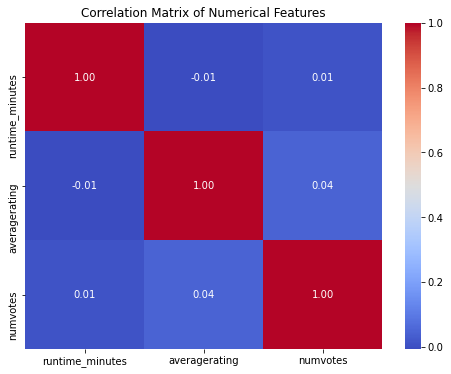

In [135]:
numerical_features = ['runtime_minutes', 'averagerating', 'numvotes']
correlation_matrix = movie_data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Explanation: 
### The perfect correlation between each variable and itself is represented by the diagonal values in this correlation heatmap being all 1.00. The correlations between runtime_minutes, averagerating, and numvotes are extremely weak, ranging between -0.01 and 0.04 when we look at the off-diagonal values. This shows that these numerical features are not significantly correlated with one another, indicating that there is no significant collinearity between them. Also, there is no need to worry about multicollinearity or redundancy when using each of these features separately in a model.

## A simple linear regression Model

Mean Squared Error: 2.4964034400804492e+16
R^2 Score: 0.5355997835611248


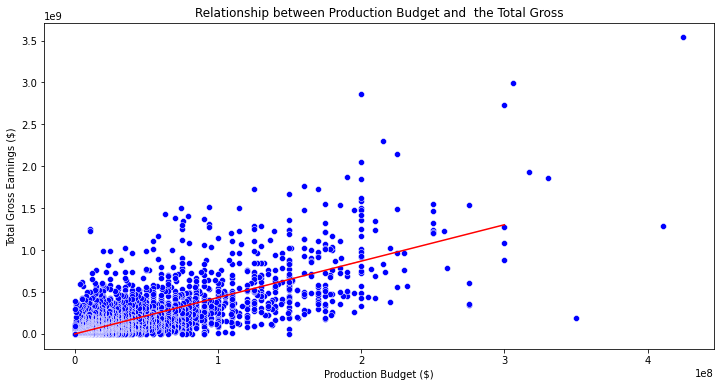

In [165]:
#Importing from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assigning the X and Y variables
X = movie_budget_df['production_budget'].values.reshape(-1, 1)
y = movie_budget_df['Total_Earnings'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting the data and the regression line
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=movie_budget_df['production_budget'], y=movie_budget_df['Total_Earnings'], color='blue', ax=ax)
sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', ax=ax)

# Customizing the plot
ax.set_title('Relationship between Production Budget and  the Total Gross')
ax.set_xlabel('Production Budget ($)')
ax.set_ylabel('Total Gross Earnings ($)')

# Evaluating the model by finding the mse and the r2 scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.show()

## Interpreting the model:
The Coefficient of Determination with the value of 0.5355997835611248 suggestthat the model explains about 54% of tha variance which indicates moderate levels of explanatory power.

In this case, the MSE is quite large (2.4964034400804492e+16). Since the values are squared, this large number suggests that there are significant differences between the actual and predicted values.

This suggests a weak positive covariance

The model has a moderate fit, as indicated by the R² score. While it explains a significant portion of the variance,further investigation may be needed but we've already established a positive linear relationship

# Visualizations 

## 1. Correlation between ratings and revenue by genre

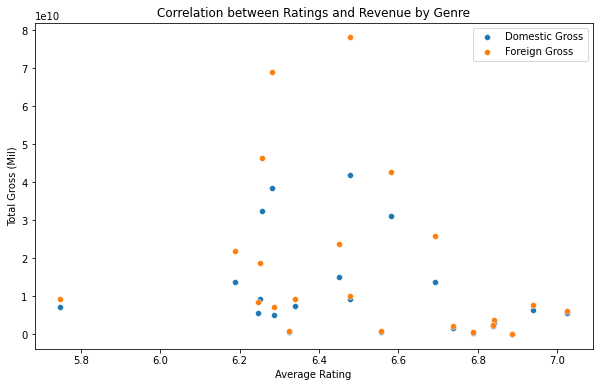

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rating', y='total_domestic_gross', data=genre_revenue, label='Domestic Gross')
sns.scatterplot(x='average_rating', y='total_foreign_gross', data=genre_revenue, label='Foreign Gross')
plt.title('Correlation between Ratings and Revenue by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross (Mil)')
plt.legend()
plt.show()

## 2. Genre income from the domestic market

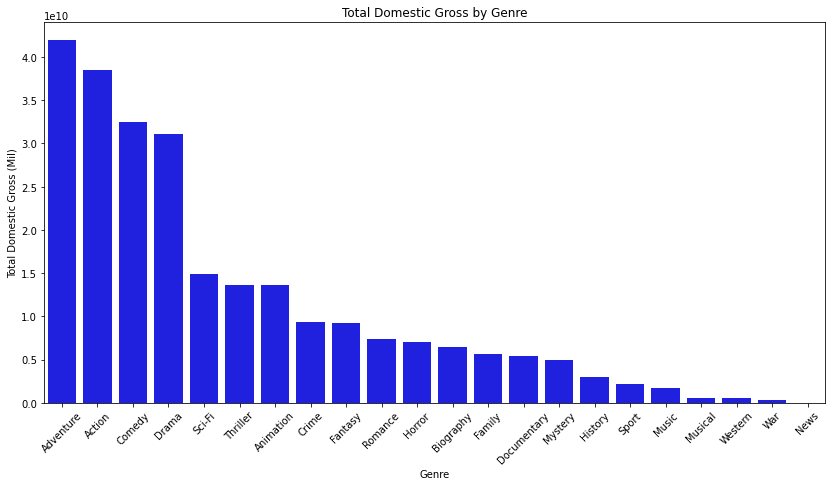

In [138]:
plt.figure(figsize=(14, 7))
sns.barplot(x='genre', y='total_domestic_gross', data=genre_revenue, color="blue")
plt.title('Total Domestic Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Domestic Gross (Mil)')
plt.xticks(rotation=45)
plt.show()

## 3. Comparison of revenue generated in the domestic and foreign markets

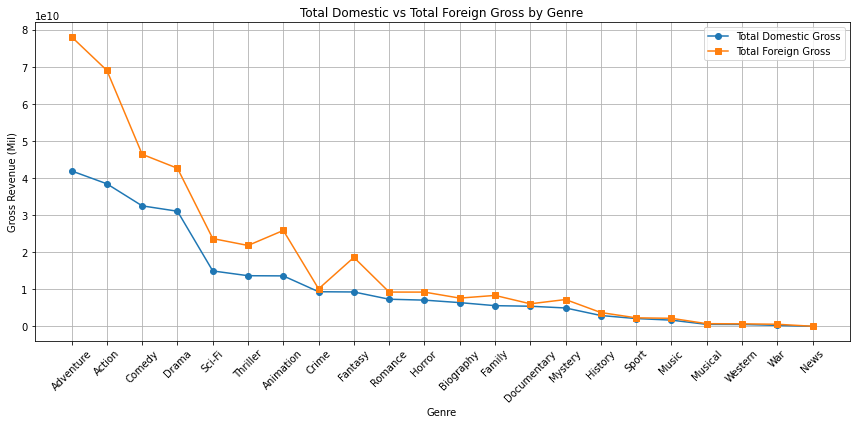

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(genre_revenue['genre'], genre_revenue['total_domestic_gross'], marker='o', label='Total Domestic Gross')
plt.plot(genre_revenue['genre'], genre_revenue['total_foreign_gross'], marker='s', label='Total Foreign Gross')
plt.title('Total Domestic vs Total Foreign Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue (Mil)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Business Questions

## Question 1

## How many movies are released each year?

In [140]:
# getting the overall data
df_popularity.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [141]:
#dropping unnecessary columns
df_popularity= df_popularity.drop(df_popularity.columns[0], axis=1)

In [142]:
# Checked for null values
df_popularity.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [143]:
# checking for duplicates
dupl=df_popularity[df_popularity.duplicated()]
dupl

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


In [144]:
# Dropping the duplicated rows
df_popularity = df_popularity[~df_popularity.duplicated(subset=['id'], keep='first')]

In [145]:
df_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [146]:
# Converting the columns type to datetime
df_popularity['release_date'] = pd.to_datetime(df_popularity['release_date'], 
                                        format='%Y-%m-%d', errors='coerce')
df_popularity['release_date'].dtype

dtype('<M8[ns]')

In [147]:
# Checking if there are any null values emerged due to an error.
df_popularity['release_date'].isnull().sum()

0

In [148]:
# Created new columns of year and month.
df_popularity['release_year'] = df_popularity['release_date'].dt.year
df_popularity['release_month'] = df_popularity['release_date'].dt.month
    
df_popularity.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7


In [149]:
#It is clear the number of movies increased each year from 2009.
df_popularity['release_year'].value_counts()[:15]

2015    3066
2013    3066
2014    3052
2016    2970
2017    2921
2011    2645
2012    2615
2018    2496
2010    2393
2019      63
2009      39
2008      13
2004      10
2005       9
2006       9
Name: release_year, dtype: int64

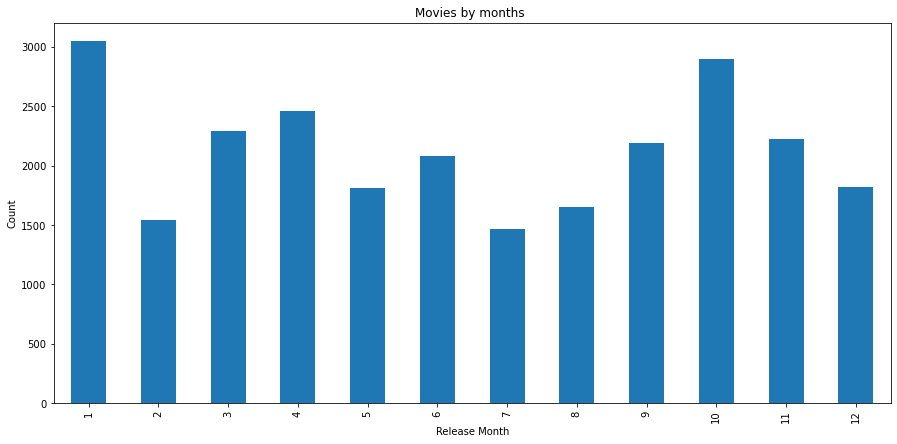

In [150]:
# Showing distribution of movies by months

fig, ax = plt.subplots(figsize=(15,7))
df_popularity.groupby('release_month')['id'].count().plot.bar()
ax.set_xlabel('Release Month')
ax.set_ylabel('Count')
ax.set_title('Movies by months ')
plt.show()

### 1.1 Findings:
According to the visualizations above we can see that the number of movies released increased after 2009 where we see the highrst number of movies released was in 2013, 2014 and 2015 and then the number went down. We can also see that the month in which many movies are released is in January followed by October.

## Question 2

## Which genre is the most successful in movie box?

In [151]:
#Merging two merged datasets to answer the business question
merged_data = pd.merge(merged_data_df,review_movieinfo_df, on = 'id')

#Checking missing values
merged_data.isna().sum()

#Dropping missing values
merged_data.dropna(inplace=True)

#Checking for duplicates
merged_data.drop_duplicates(inplace=True)

genre_success = merged_data.groupby('genre')['worldwide_gross'].sum().reset_index()
sorted_genre_Success = genre_success.sort_values(by = 'worldwide_gross', ascending=True)
first_ten = sorted_genre_Success.tail(10)

In [152]:
# Save the top ten genres data to an Excel file
first_ten.to_excel('top_ten_genres.xlsx', index=False)

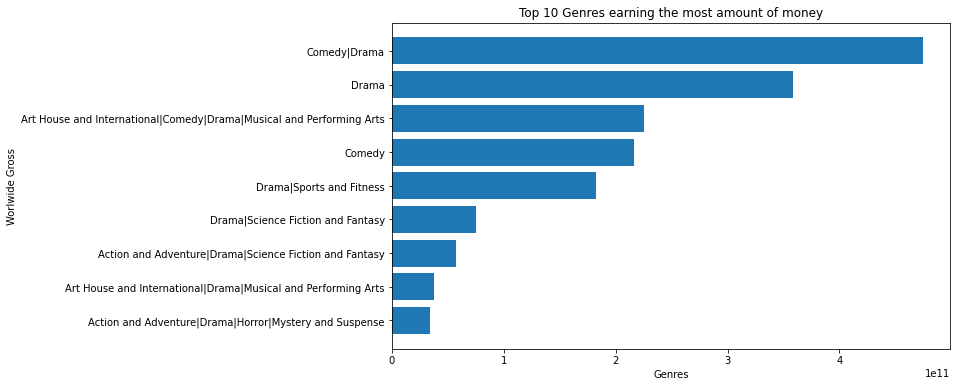

In [153]:
# Plotting a horizontal bar chart to show the top 10 genres by worldwide gross revenue

plt.figure(figsize=(10, 6))
plt.barh(first_ten['genre'], first_ten['worldwide_gross'])
plt.xlabel('Genres')
plt.ylabel('Worlwide Gross')
plt.title('Top 10 Genres earning the most amount of money')
plt.show()

## 2.1 Findings
According to the data, the most popular genre at the box office is commedy|drama, which is followed by drama. This indicates that viewers enjoy movies that are funny and evoke feelings presented by the drama genre.

Concentrating on genres like "Comedy|Drama" and "Drama" could be a lucrative approach to filmmaking. Also, diversity in genres, such as combining comedy and musicals or drama and science fiction, also offers substantial financial potential.

## Question 3

## Which production budget ranges yield the most profitable movies?

### Does a higher production budget lead to more profitable movies than those with lower production budgets?

In [154]:
#computing the net income 
movie_budget_df['net_income']=(movie_budget_df['domestic_gross']+
            movie_budget_df['worldwide_gross'])- movie_budget_df['production_budget']

In [155]:
# checking for min and max and outliers
movie_budget_df['net_income'].describe()

count    5.782000e+03
mean     1.017730e+08
std      2.108880e+08
min     -1.574753e+08
25%     -3.098222e+05
50%      2.499538e+07
75%      1.111648e+08
max      3.111853e+09
Name: net_income, dtype: float64

<AxesSubplot:xlabel='production_budget', ylabel='net_income'>

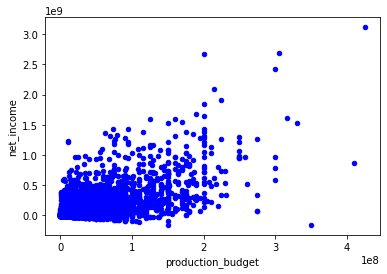

In [156]:
#making scatter plot which shows positive connection between production budget and net income.
movie_budget_df.plot.scatter(x='production_budget',
                      c='Blue',
                      y='net_income',)

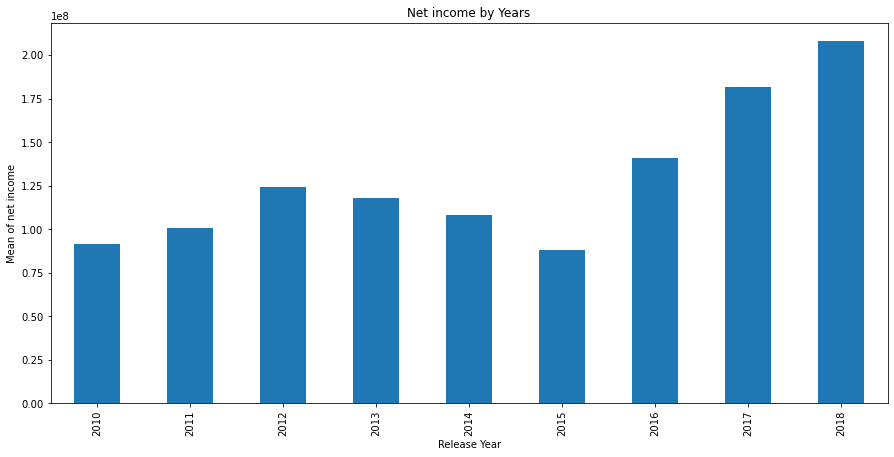

In [157]:
# showing the change of net income over the years considering the mean to get better results
#We can see starting from 2016 net income is increasing
fig, ax = plt.subplots(figsize=(15,7))
movie_budget_df[(movie_budget_df["release_year"] >= 2010) & 
           (movie_budget_df["release_year"] <2019)].groupby('release_year')['net_income'].mean().plot.bar()
ax.set_ylabel('Mean of net income')
ax.set_xlabel('Release Year')
ax.set_title('Net income by Years')
plt.show()

In [158]:
#defining a function for different ranges
def product_budg_range(production_budget):
    if production_budget < 5000000:
        return "< $5M"
    elif 5000000 <= production_budget <= 10000000:
        return "$5-10M"
    elif 10000000 <= production_budget <= 20000000:
        return "$10-20M"
    elif 2000000 <= production_budget <= 30000000:
        return "$20-30M"
    elif 3000000 <= production_budget <= 40000000:
        return "$30-40M"
    elif 40000000 <= production_budget <= 50000000:
        return "$40-50M"
    elif 50000000 < production_budget <= 60000000:
        return "$50-60M"
    elif 60000000 < production_budget <= 70000000:
        return "$60-70M"
    elif 70000000 <= production_budget <= 80000000:
        return "$70-80M"
    elif 80000000 < production_budget <= 90000000:
        return "$80-90M"
    elif 90000000 < production_budget <= 1000000000:
        return "$90-100M"
    
    else:
        return "> $100M"

In [159]:
#creating a new column to connect each movie with it's production budget range.

movie_budget_df['PB_ranges'] = movie_budget_df['production_budget'].apply(product_budg_range)
movie_budget_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,release_month,Total_Earnings,net_income,PB_ranges
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,7.605076e+18,3.111853e+09,$90-100M
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,2.410639e+18,8.761278e+08,$90-100M
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,4.276235e+16,-1.574753e+08,$90-100M
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,4.590059e+18,1.531420e+09,$90-100M
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,6.201814e+18,1.619903e+09,$90-100M


In [160]:
#adding a column that tells us whether or not a movie was profitable

movie_budget_df['profitable'] = movie_budget_df['net_income'].apply(lambda x: "Yes" if x>1 else "No")
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_year       5782 non-null   int64         
 7   release_month      5782 non-null   int64         
 8   Total_Earnings     5782 non-null   float64       
 9   net_income         5782 non-null   float64       
 10  PB_ranges          5782 non-null   object        
 11  profitable         5782 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 542.2+ KB


Text(0.5, 1.03, 'Distribution of Profitability by Budget Ranges')

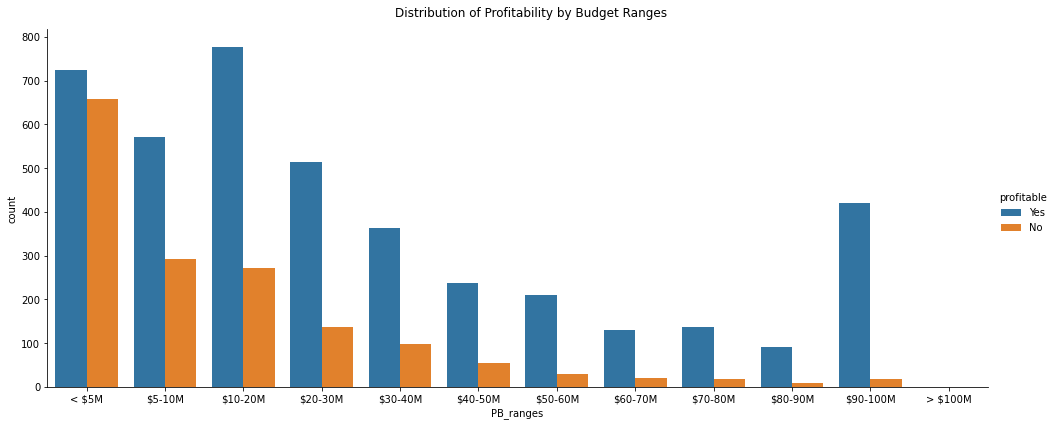

In [169]:
# showing the results where we can see which range is more profitable
order = ["< $5M", "$5-10M", "$10-20M", "$20-30M",
         "$30-40M", "$40-50M", "$50-60M", "$60-70M",
         "$70-80M", "$80-90M", "$90-100M", "> $100M"]

catplot = sns.catplot(x='PB_ranges',
                      data=movie_budget_df,
                      kind="count", hue='profitable',
                      height=5.5, aspect=2.5, order=order)

catplot.fig.suptitle("Distribution of Profitability by Budget Ranges", y=1.03) 


## 3.1 Findings:
The scatter plot indicates that net income and production budget are positively correlated. Although returns vary greatly, bigger production budgets typically result in higher net revenues. Some expensive films don't make a lot of money, proving that money isn't the only factor that determines success.

From 2010 to 2018, the mean net income of films increased steadily, as shown by the bar chart (second image). The biggest increase is seen beginning in 2016, suggesting that the movie business has become more profitable over time.

As shown in the third chart,films with smaller budgets (less than 5 million) make less money. However, the frequency of lucrative films climbs with the production budget, particularly in the 10M–20M and 90M–100M categories. This trend implies that films with medium to high budgets have a higher chance of making money.

# Business Recommendations

### 1. Invest in the highly rated genres
The business should expand into genres where success is closely correlated with higher ratings. The genres of commedy|drama, drama, and drama|sport and fitness show that favorable reviews greatly increase their revenue.

### 2. Target global market
The company should consider investing in the global audience. Our analysis indicates that almost every genre does well in the foreign market compared to the domestic market.

### 3. Ensure a balanced budget to maximize ROI.
The company should give priority to making films with budgets between $10 million and $20 million because there are the most successful projects in this range. 